In [0]:
'''
This Colab Notebook is to analyse and visualise hidden layers of Conv layers on different Transfer Learning Architectures
'''

In [42]:
#Download dataset of Cats and Dogs containing 25,000 images 

!wget -c https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2020-02-10 18:25:14--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.178.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.178.5|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [43]:
#unzip the zipped dataset folder that is downloaded

!unzip -qq Cat_Dog_data.zip

replace Cat_Dog_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
#import necessary packages

import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import InceptionResNetV2
# from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [0]:
#download Inception_ResNetv2 architecture last layers data
base_model=InceptionResNetV2(weights='imagenet',include_top=False) #imports the inception_resnetv2 model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='sigmoid')(x) #final layer with sigmoid activation

In [0]:
#load model with inputs

model=Model(inputs=base_model.input,outputs=preds)

In [47]:
#print the model summary on how many layers, filters and functions being used

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_407 (BatchN (None, None, None, 3 96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_407 (Activation)     (None, None, None, 3 0           batch_normalization_407[0][0]    
____________________________________________________________________________________________

In [48]:
#print each and every layer details

for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_3
1 conv2d_407
2 batch_normalization_407
3 activation_407
4 conv2d_408
5 batch_normalization_408
6 activation_408
7 conv2d_409
8 batch_normalization_409
9 activation_409
10 max_pooling2d_9
11 conv2d_410
12 batch_normalization_410
13 activation_410
14 conv2d_411
15 batch_normalization_411
16 activation_411
17 max_pooling2d_10
18 conv2d_415
19 batch_normalization_415
20 activation_415
21 conv2d_413
22 conv2d_416
23 batch_normalization_413
24 batch_normalization_416
25 activation_413
26 activation_416
27 average_pooling2d_3
28 conv2d_412
29 conv2d_414
30 conv2d_417
31 conv2d_418
32 batch_normalization_412
33 batch_normalization_414
34 batch_normalization_417
35 batch_normalization_418
36 activation_412
37 activation_414
38 activation_417
39 activation_418
40 mixed_5b
41 conv2d_422
42 batch_normalization_422
43 activation_422
44 conv2d_420
45 conv2d_423
46 batch_normalization_420
47 batch_normalization_423
48 activation_420
49 activation_423
50 conv2d_419
51 conv2d_421
52 conv2d_42

In [0]:
#initialising the specific layers as trainable and freezing the rest layers

for layer in model.layers:
    layer.trainable=True
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:755]:
    layer.trainable=False
for layer in model.layers[755:]:
    layer.trainable=True

In [50]:
#initialise the training dataset and training parameters

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/Cat_Dog_data/train/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 22500 images belonging to 2 classes.


In [51]:
#Training starts with initialise epochs size

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history= model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
703/703 [==============================] - 109s 155ms/step - loss: 0.1154 - acc: 0.9549
Epoch 2/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0878 - acc: 0.9682
Epoch 3/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0809 - acc: 0.9708
Epoch 4/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0620 - acc: 0.9774
Epoch 5/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0554 - acc: 0.9797
Epoch 6/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0429 - acc: 0.9837
Epoch 7/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0475 - acc: 0.9840
Epoch 8/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0439 - acc: 0.9854
Epoch 9/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0343 - acc: 0.9877
Epoch 10/10
703/703 [==============================] - 97s 138ms/step - loss: 0.0288 - acc: 0.9891


In [0]:
def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    # print(img_tensor)
    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
    

In [0]:
acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

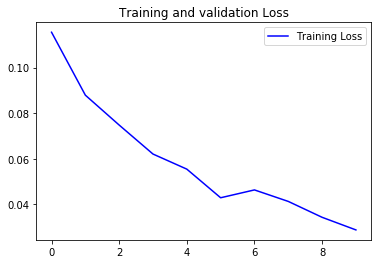

In [54]:
# Plotting Training and Validation Loss
import matplotlib.pyplot as plt
epochs = range(0, 10)
plt.plot(epochs, loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

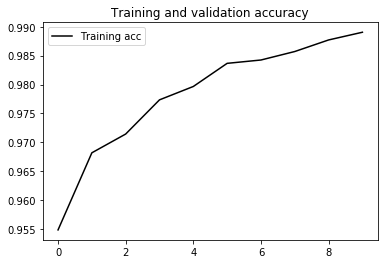

In [55]:
# Plotting Training and Validation Accuracy

plt.plot(epochs, acc, 'k', label='Training acc')
# plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [56]:
from keras.preprocessing.image import img_to_array, load_img
import random 
layer_names_list = [layr.name for layr in model.layers]
print ("layer names list: ", layer_names_list)  

layer names list:  ['input_3', 'conv2d_407', 'batch_normalization_407', 'activation_407', 'conv2d_408', 'batch_normalization_408', 'activation_408', 'conv2d_409', 'batch_normalization_409', 'activation_409', 'max_pooling2d_9', 'conv2d_410', 'batch_normalization_410', 'activation_410', 'conv2d_411', 'batch_normalization_411', 'activation_411', 'max_pooling2d_10', 'conv2d_415', 'batch_normalization_415', 'activation_415', 'conv2d_413', 'conv2d_416', 'batch_normalization_413', 'batch_normalization_416', 'activation_413', 'activation_416', 'average_pooling2d_3', 'conv2d_412', 'conv2d_414', 'conv2d_417', 'conv2d_418', 'batch_normalization_412', 'batch_normalization_414', 'batch_normalization_417', 'batch_normalization_418', 'activation_412', 'activation_414', 'activation_417', 'activation_418', 'mixed_5b', 'conv2d_422', 'batch_normalization_422', 'activation_422', 'conv2d_420', 'conv2d_423', 'batch_normalization_420', 'batch_normalization_423', 'activation_420', 'activation_423', 'conv2d_41

In [57]:
selected_layers = ["conv2d_407", "conv2d_408", "conv2d_409"]
matched_indices = [i for i, item in enumerate(layer_names_list) if item in selected_layers]
print (matched_indices)

[1, 4, 7]


In [0]:
selected_layers_outputs = []
for lr in range(len(matched_indices)):
   outputs = model.layers[matched_indices[lr]].output 
   #output from selected layers
   selected_layers_outputs.append(outputs)

In [0]:
visual_model = keras.models.Model(inputs = model.input, outputs = selected_layers_outputs)

In [60]:
visual_model

In [61]:
random_cat_dog = '/content/Cat_Dog_data/test/cat/cat.10009.jpg'
rand_img = load_img(random_cat_dog, target_size=(160, 160))
rand_img_arr = img_to_array(rand_img)
print ("shape of selected image :", rand_img_arr.shape)
x_in = np.reshape(rand_img_arr, (1, 160, 160, 3)) # batch size 1

shape of selected image : (160, 160, 3)


In [0]:
selected_feature_maps = visual_model.predict(x_in)

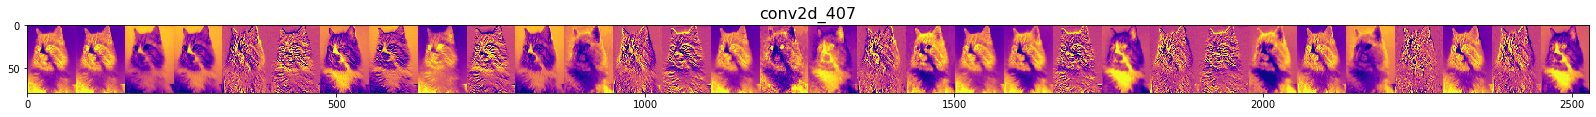

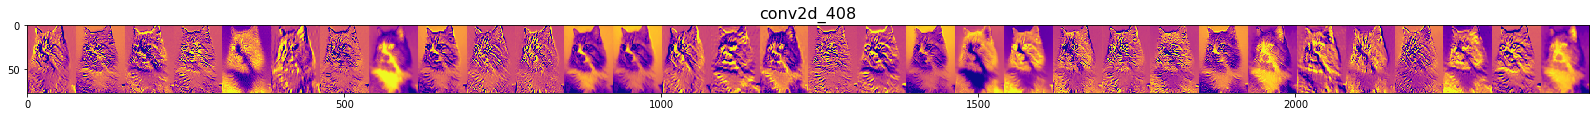

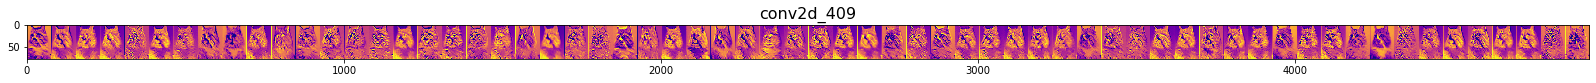

In [64]:
for lr_name, feat_map in zip(selected_layers, selected_feature_maps):
  n_filters = feat_map.shape[-1]
  n_size = feat_map.shape[1]
  display_grid = np.zeros((n_size, n_size * n_filters))
  for i in range(n_filters):
    y = feat_map[0, :, :, i]
    y = y - y.mean()
    y = y/y.std()
    y = y*64
    y = y + 128
    y = np.clip(y, 0, 255).astype('uint8')# value only between 0, 255. 
    display_grid[:, i * n_size : (i+1) * n_size] = y
  scale = 20./n_filters
  plt.figure(figsize=(scale * n_filters * 1.4, scale * 2))
  plt.title(lr_name, fontsize=16)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='plasma')

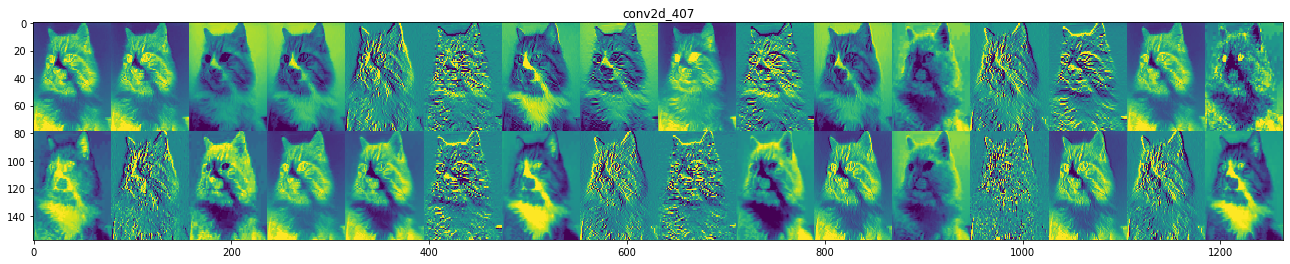

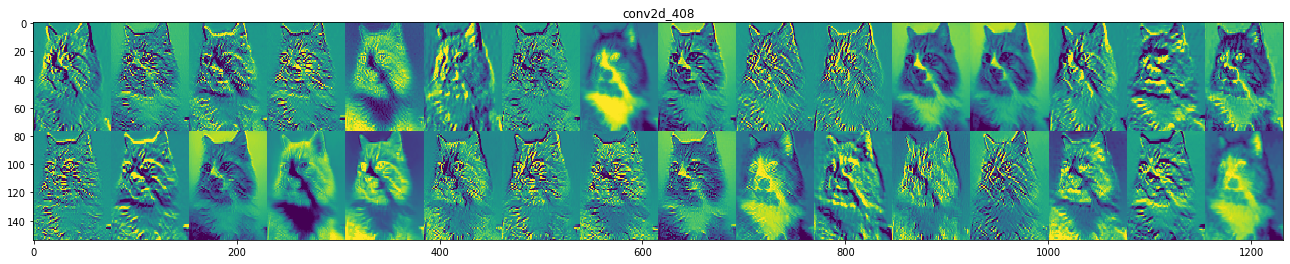

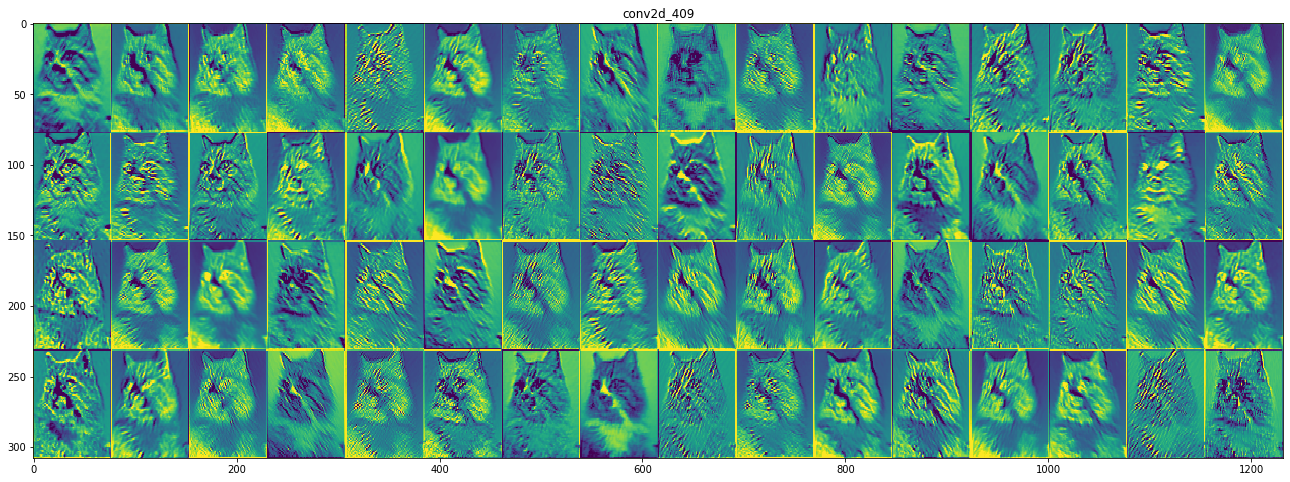

In [65]:
images_per_row = 16
for lr_name1, feat_map1 in zip(selected_layers, selected_feature_maps):
  n_filters1 = feat_map1.shape[-1]
  n_size1 = feat_map1.shape[1]
  n_cols = n_filters1 // images_per_row
  display_grid1 = np.zeros((n_size1 * n_cols, images_per_row * n_size1))
  for col in range(n_cols):
    for row in range(images_per_row):
      chan_img = feat_map1[0, :, :, col*images_per_row + row]
      chan_img = chan_img - chan_img.mean()
      chan_img = chan_img / chan_img.std()
      chan_img = chan_img * 64
      chan_img = chan_img + 128
      chan_img = np.clip(chan_img, 0, 255).astype('uint8')
      display_grid1[col * n_size1 : (col+1) * n_size1, row * n_size1 : (row+1) * n_size1] = chan_img
  scale1 = 1./n_size1
  plt.figure(figsize=(scale1 * display_grid1.shape[1]*1.4, scale1 * display_grid1.shape[0] * 2.))
  plt.title(lr_name1)
  plt.grid(False)
  plt.imshow(display_grid1, aspect='auto', cmap='viridis')